In [1]:
import rmgpy.chemkin
import rmgpy.data.rmg

In [2]:
chemkin = 'chem_annotated-gas.inp'
surface = 'chem_annotated-surface.inp'
species_dict = 'species_dictionary.txt'

species_list, reaction_list = rmgpy.chemkin.load_chemkin_file(chemkin, species_dict, surface_path=surface)

In [4]:
# load kinetics database (required for labeling atoms)

database = rmgpy.data.rmg.RMGDatabase()

thermo_libraries = [
    'primaryThermoLibrary',
    'surfaceThermoPt111',
]

database.load(
    path = rmgpy.settings['database.directory'],
    thermo_libraries = thermo_libraries,
    transport_libraries = [],
    reaction_libraries = [],
    seed_mechanisms = [],
    kinetics_families = 'all',
    kinetics_depositories = ['training'],
    #frequenciesLibraries = self.statmechLibraries,
    depository = False,
)
for family in database.kinetics.families:
    if not database.kinetics.families[family].auto_generated:
        database.kinetics.families[family].add_rules_from_training(thermo_database=database.thermo)
        database.kinetics.families[family].fill_rules_by_averaging_up(verbose=True)


ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([60.2599,68.0494,74.7775,80.9311,90.8846,97.4337,105.393],'J/(mol*K)'), H298=(-477.191,'kJ/mol'), S298=(269.551,'J/(mol*K)'), Cp0=(33.2579,'J/(mol*K)'), CpInf=(103.931,'J/(mol*K)'), comment="""Thermo group additivity estimation: group(O2s-(Cds-Cd)(Cds-Cd)) + group(O2s-(Cds-O2d)H) + group(Cds-OdOsOs) + group(Li-OCOdO) + radical(OC=OOJ)""").
The thermo for this species is probably wrong! Setting CpInf = Cphigh for Entropy calculationat T = 2000.0 K...
ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([60.2599,68.0494,74.7775,80.9311,90.8846,97.4337,105.393],'J/(mol*K)'), H298=(-477.191,'kJ/mol'), S298=(269.551,'J/(mol*K)'), Cp0=(33.2579,'J/(mol*K)'), CpInf=(103.931,'J/(mol*K)'), comment="""Thermo group additivity estimation: group(O2s-(Cds-Cd)(Cds-Cd)) + group(O2s-(Cds-O2d)H) + group(Cds-OdOsOs) + group(Li-OCOdO) + radical(OC=OOJ)""").
The thermo for this species is probably wrong! Setting CpInf = Cphigh for En

In [20]:
i = 385

assert hasattr(reaction_list[i], 'family') and reaction_list[i].family in database.kinetics.families


# label the atoms
database.kinetics.families[reaction_list[i].family].add_atom_labels_for_reaction(reaction_list[i])

print(f'Reaction {i}:\t{reaction_list[i]}\t\t{reaction_list[i].family}')


print('Reactants:')
for reactant in reaction_list[i].reactants:
    print(reactant.to_adjacency_list())
    print()
    
print('Products:')
for product in reaction_list[i].products:
    print(reactant.to_adjacency_list())
    print()


Reaction 385:	X(1) + H(2) <=> HX(3)		Surface_Adsorption_Single
Reactants:
X
1 *2 X u0 p0 c0


H
multiplicity 2
1 *1 H u1 p0 c0


Products:
H
multiplicity 2
1 *1 H u1 p0 c0




384

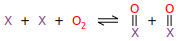

410

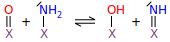

385

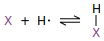

386

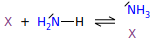

394

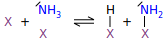

396

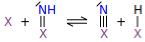

398

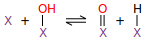

In [22]:
# Important reactions:

important_list = [384, 410, 385, 386, 394, 396, 398]
for i in important_list:
    display(i, reaction_list[i])
